# ALFALFA - Data Cube manipulation with Python

**Opening and manipulating an ALFALFA data cube**






In [0]:
from google.colab import drive
drive.mount('/content/drive')

**Define a FITS file and get the file information**

In [7]:
from astropy.io import fits
spectralfitsfile = '/content/drive/My Drive/Colab Notebooks/1220+09a_spectral.fits'
spectralweightsfitsfile = '/content/drive/My Drive/Colab Notebooks/1220+09a_spectralweights.fits'
continuumfitsfile = '/content/drive/My Drive/Colab Notebooks/1220+09a_continuum.fits'
continuumweightsfitsfile = '/content/drive/My Drive/Colab Notebooks/1220+09a_continuumweights.fits'
fits.info(spectralfitsfile)

Filename: /content/drive/My Drive/Colab Notebooks/1220+09a_spectral.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     102   (144, 144, 1024, 2)   float32   


**Get the cube, cube weights, continuum map, continuum weights, and associated headers**

In [0]:
from astropy.io.fits import getdata
datacube, primary_hdr = getdata(spectralfitsfile, 0, header=True)
weights, weights_hdr = getdata(spectralweightsfitsfile, 0, header=True)
cont, continuum_hdr = getdata(continuumfitsfile, 0, header=True)
contweights, contweights_hdr = getdata(continuumweightsfitsfile, 0, header=True)

**Show a particular channel and polarization with MatPlotlib**

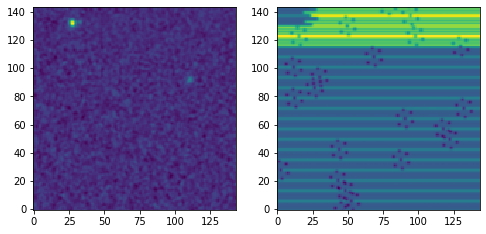

In [9]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(datacube[0,406,:,:], origin='lower')

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(weights[0,406,:,:], origin='lower')
plt.show()



**Show a polarization averaged continuum map**

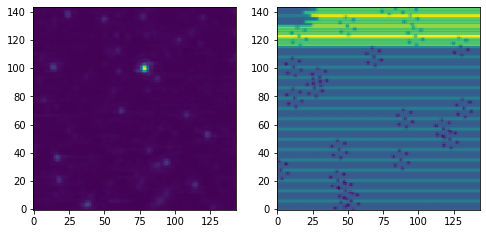

In [10]:
import numpy as np

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow((cont[0,:,:]+cont[1,:,:])/2.0, origin='lower')

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow((contweights[0,:,:]+contweights[1,:,:])/2.0, origin='lower')
plt.show()

**Show a spectrum and weights**

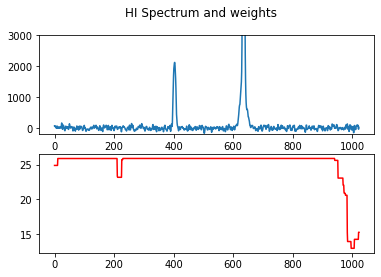

In [11]:
fig, axs = plt.subplots(2)
fig.suptitle('HI Spectrum and weights')


avgcube = np.mean(datacube, axis=0)
avgcube.shape
spectrum = np.sum(avgcube[:,128:137,24:34], axis=(1,2))

avgweights = np.mean(weights, axis=0)
weightsspectrum = np.mean(avgweights[:,128:137,24:34], axis=(1,2))

axs[0].plot(spectrum)
axs[0].set_ylim([-200,3000])
axs[1].plot(weightsspectrum, color='red')

plt.show()